# [IAPR][iapr]: Lab 1 ‒  Image segmentation


**Group ID:** 02

**Author 1 (sciper):** Student Name 1 (xxxxx)  
**Author 2 (sciper):** Student Name 2 (xxxxx)   
**Author 3 (sciper):** Student Name 3 (xxxxx)   

**Release date:** 12.03.2021  
**Due date:** 26.03.2021 


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

---
## 0. Extract relevant data
We first need to extract the `lab-01-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-01-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')

if not os.path.exists(tar_path):
    raise Exception('Path to is not valid {}'.format(tar_path))
    
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

---
## Part 1: Brain segmentation

Your goal: compute the size of the brain (without the skull) in pixels in a 2D image of a human head taken by Magnetic Resonance Imaging (MRI) using:
* Region growing (5 pts)
* Contour detection (5 pts)
* Additional method of your choice (5 pts)

Each section should display the resulting segmenttion as well as the size in pixel of the detected region. Comment each method limitations and/or advantages.

### 1.1 Brain image visualization

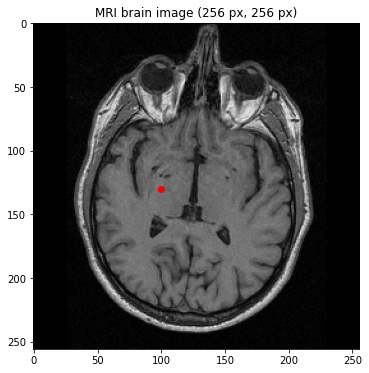

In [2]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

# Load image
data_path = os.path.join(data_base_path, data_folder)
brain_im = skimage.io.imread(os.path.join(data_path, 'brain-slice40.tiff'))
im_h, im_w = brain_im.shape

# Display MRI image
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(brain_im, cmap='gray')
ax.set_title('MRI brain image ({} px, {} px)'.format(im_h, im_w))
# ax.axis('off')
plt.scatter(100, 130, color='r')
plt.show()

### 1.2 Region growing (5pts)

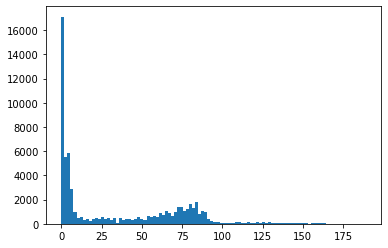

In [4]:
plt.hist(brain_im.flatten(), bins=100)
plt.show()

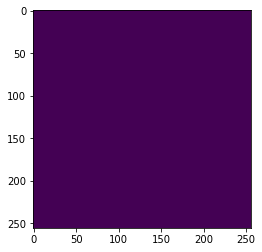

In [3]:
import numpy as np

img_mask = 2*np.ones(brain_im.shape).astype('int8')
plt.imshow(img_mask)
plt.show()

In [6]:
# Add your implementation and discussion


def similar(p_1, p_2):
    thresh = 8
    value = np.abs(int(p_1) - int(p_2))
#     print(value)
    return value < thresh

    
def region_growing(img, curr_pix):
    #global img_mask
    for i in range(-1,2): #img[curr_pix[0]-1:curr_pix[0]+2, curr_pix[1]-1:curr_pix[1]+2]:
        for j in range(-1,2):
            if i!=0 or j!=0:
#                 print(curr_pix[0]+i, curr_pix[1]+j)
                if img_mask[curr_pix[0]+i, curr_pix[1]+j] == 2:
#                     print("foo")
                    if similar(img[curr_pix], img[curr_pix[0]+i, curr_pix[1]+j]):
                        img_mask[curr_pix[0]+i, curr_pix[1]+j] = 1
#                         print("recursion time !")
                        region_growing(img, (curr_pix[0]+i, curr_pix[1]+j))
                    else:
                        img_mask[curr_pix[0]+i, curr_pix[1]+j] = 0              


In [ ]:
from skimage

In [ ]:
# hack
import sys
#sys.setrecursionlimit(256*256)

plt.figure(figsize=(10,10))
init_pix = (130,100)
img_mask = 2*np.ones(brain_im.shape).astype('uint8')
print('Before the mess')
region_growing(brain_im, init_pix)
print('After the mess')
plt.imshow(brain_im, cmap='gray')
plt.imshow(img_mask, alpha=0.5)
plt.show()

In [9]:
import sys
sys.getrecursionlimit()

3000

### 1.3 Contour detection (5pts)

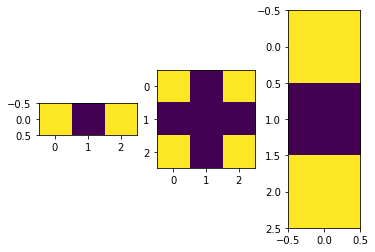

In [38]:
# Add your implementation and discussion
L_xx = np.array([1, -2, 1]).reshape(1,-1)
L_xy = np.array([[0.25, 0, 0.25],[0, 0, 0], [0.25, 0, 0.25]])
L_yy = L_xx.reshape(-1,1)
plt.subplot(1,3,1)
plt.imshow(L_xx)
plt.subplot(1,3,2)
plt.imshow(L_xy)
plt.subplot(1,3,3)
plt.imshow(L_yy)
plt.show()

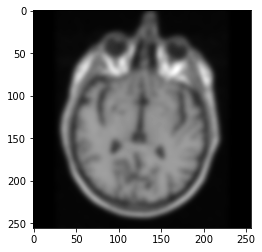

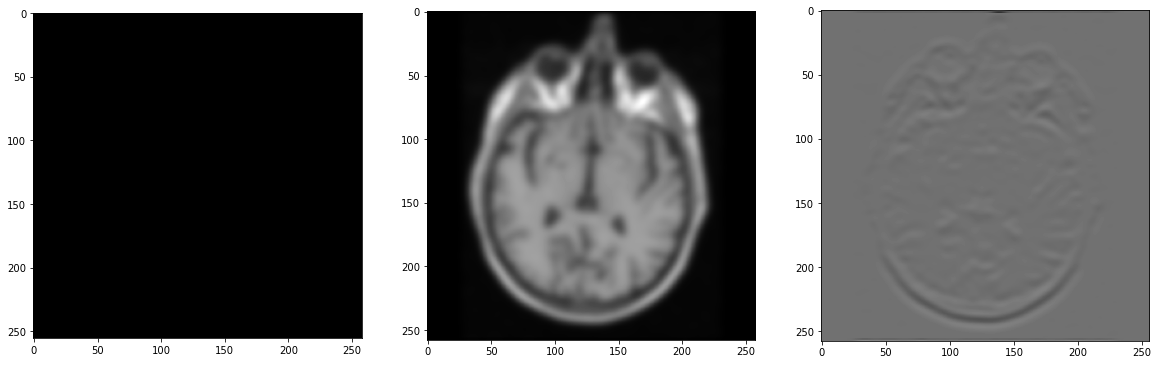

In [42]:
from scipy.signal import convolve2d
import skimage.filters as filters
blurred = filters.gaussian(brain_im, sigma=3)

filtered_x = 

plt.figure()
plt.imshow(blurred, cmap='gray')
plt.show()
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(np.abs(convolve2d(blurred, L_xx)) < 100, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(convolve2d(blurred, L_xy), cmap='gray')
plt.subplot(1,3,3)
plt.imshow(convolve2d(blurred, L_yy), cmap='gray')
plt.show()
plt.hist(convolve2d(brain_im, L_xy).flatten(), bins=100)
plt.show()

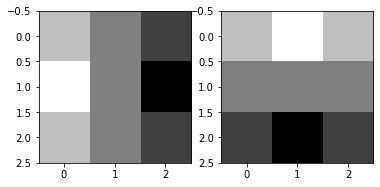

In [44]:
#Sobel filters
sobel_y = np.array([[1, 2, 1], [0,0,0], [-1,-2,-1]])
sobel_x = sobel_y.T
plt.subplot(1,2,1)
plt.imshow(sobel_x, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(sobel_y, cmap='gray')
plt.show()

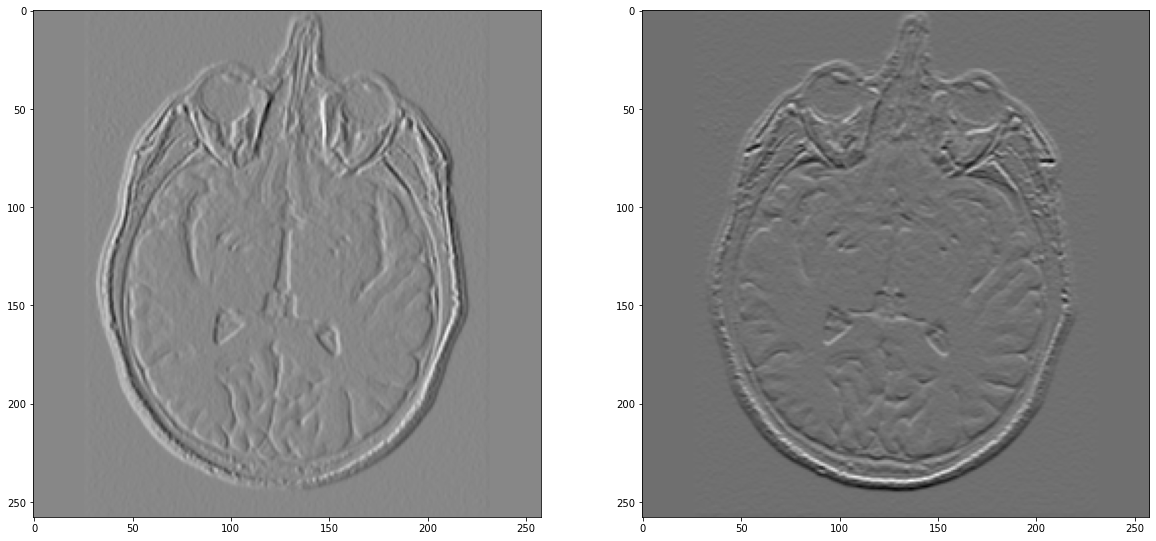

In [47]:
#Filter by sobel

# plt.figure()
# plt.imshow(blurred, cmap='gray')
# plt.show()
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(convolve2d(brain_im, sobel_x), cmap='gray')
plt.subplot(1,2,2)
plt.imshow(convolve2d(brain_im, sobel_y), cmap='gray')
plt.show()
# plt.hist(convolve2d(brain_im, L_xy).flatten(), bins=100)
# plt.show()

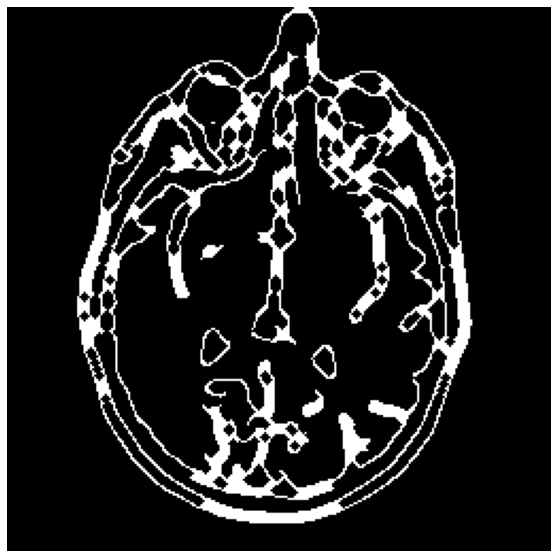

In [97]:
from skimage.feature import canny
from skimage.morphology import binary_closing, dilation
edges = canny(brain_im, sigma=1.7)
edges = binary_closing(edges, selem=skimage.morphology.disk(2))

plt.figure(figsize=(10,10))
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

In [63]:
edges.max()

True

### 1.4 Additional method (5pts)

In [9]:
# Add your implementation and discussion

---
## Part 2: Shape/color segmentation

You will find hereafter three pictures taken under three different illuminations, containing some shapes with different colors. We ask you to create a routine to:

1. Count the number of shapes of each color (5pts).
2. Compute the total area (in pixels) of each color (5pts).

Please note that one specific challenge is to be robust to illumination changes. Therefore some kind of intensity normalization should probably be used.

### 2.1 Visualization

In [10]:
# Load images
im_names = ['arena-shapes-01', 'arena-shapes-02', 'arena-shapes-03']
filenames = [os.path.join(data_path, name) + '.png' for name in im_names]
ic = skimage.io.imread_collection(filenames)
images = skimage.io.concatenate_images(ic)
print('Number of images: ', images.shape[0])
print('Image size: {}, {} '.format(images.shape[1], images.shape[2]))
print('Number of color channels: ', images.shape[-1])

Number of images:  3
Image size: 480, 640 
Number of color channels:  3


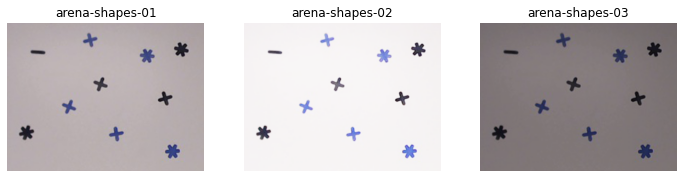

In [11]:
# Plot images
fig, axes = plt.subplots(1, 3, figsize=(12, 12))
for ax, im, nm in zip(axes.ravel(), images, im_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)
plt.show()

### 2.2 Number of shapes of each color (5 pts)

In [12]:
# Add your implementation and discussion

### 2.3 Total area (in pixels) of each color (5 pts)

In [13]:
# Add your implementation and discussion